<a href="https://colab.research.google.com/github/viniciusyy/PJM-Hourly-Energy-Consumption/blob/main/notebooks/01_eda_pjm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória da Demanda Horária de Energia – PJM

Este notebook faz a análise exploratória inicial de uma série temporal de demanda de energia elétrica (MW) da PJM Interconnection.

**Objetivos deste notebook:**
- Carregar e entender o dataset de consumo horário.
- Verificar o intervalo de datas e a frequência dos dados.
- Visualizar a série temporal completa.
- Calcular e analisar médias móveis em diferentes janelas (por exemplo, 24h e 7 dias).
- Discutir brevemente tendências, sazonalidade e comportamento geral da série.

O dataset original foi obtido no Kaggle (*Hourly Energy Consumption*), e aqui estamos utilizando apenas uma das regiões (por exemplo, `PJM_Load_hourly.csv`).


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# deixar gráficos aparecendo direto no notebook
%matplotlib inline

pd.set_option("display.max_rows", 10)
pd.set_option("display.max_columns", None)


In [2]:
csv_path = "PJM_Load_hourly.csv"

df = pd.read_csv(
    csv_path,
    parse_dates=[0]  # normalmente a primeira coluna é o timestamp
)

df.head()


,Datetime,PJM_Load_MW
0,1998-12-31 01:00:00,29309.0
1,1998-12-31 02:00:00,28236.0
2,1998-12-31 03:00:00,27692.0
3,1998-12-31 04:00:00,27596.0
4,1998-12-31 05:00:00,27888.0


In [3]:
print(df.columns)


Index(['Datetime', 'PJM_Load_MW'], dtype='object')


In [4]:
df = df.rename(columns={
    df.columns[0]: "timestamp",
    df.columns[1]: "load_mw"
})

df = df.set_index("timestamp").sort_index()

df.head()


,load_mw
timestamp,
1998-04-01 01:00:00,22259.0
1998-04-01 02:00:00,21244.0
1998-04-01 03:00:00,20651.0
1998-04-01 04:00:00,20421.0
1998-04-01 05:00:00,20713.0


In [5]:
print("Primeira data:", df.index.min())
print("Última data:", df.index.max())
print("Número de linhas:", len(df))

df['load_mw'].describe()


Primeira data: 1998-04-01 01:00:00
Última data: 2002-01-01 00:00:00
Número de linhas: 32896


,load_mw
count,32896.000000
mean,29766.427408
std,5849.769954
min,17461.000000
25%,25473.000000
50%,29655.000000
75%,33073.250000
max,54030.000000


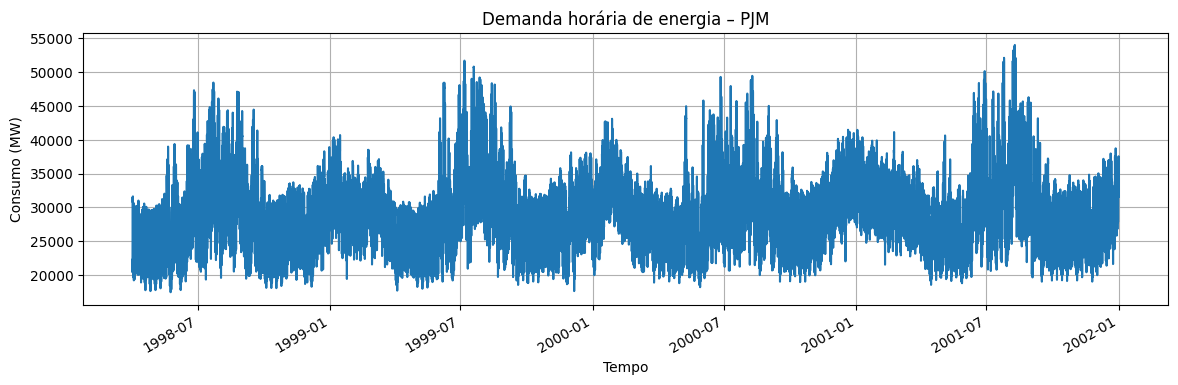

In [6]:
plt.figure(figsize=(14,4))
df['load_mw'].plot()
plt.title("Demanda horária de energia – PJM")
plt.xlabel("Tempo")
plt.ylabel("Consumo (MW)")
plt.grid(True)
plt.show()


## Comentários iniciais sobre a série

- A série apresenta variação ao longo do tempo, com picos e vales bem definidos.
- Visualmente, é possível suspeitar de uma sazonalidade **diária** (padrão dia x noite) e também **anual** (verão x inverno).
- Existem picos de demanda que podem estar associados a períodos de clima extremo (ondas de calor ou frio).


In [7]:
df['mm_24h'] = df['load_mw'].rolling(window=24).mean()
df['mm_7d']  = df['load_mw'].rolling(window=24*7).mean()

df[['load_mw', 'mm_24h', 'mm_7d']].head()


,load_mw,mm_24h,mm_7d
timestamp,,,
1998-04-01 01:00:00,22259.0,NaN,NaN
1998-04-01 02:00:00,21244.0,NaN,NaN
1998-04-01 03:00:00,20651.0,NaN,NaN
1998-04-01 04:00:00,20421.0,NaN,NaN
1998-04-01 05:00:00,20713.0,NaN,NaN


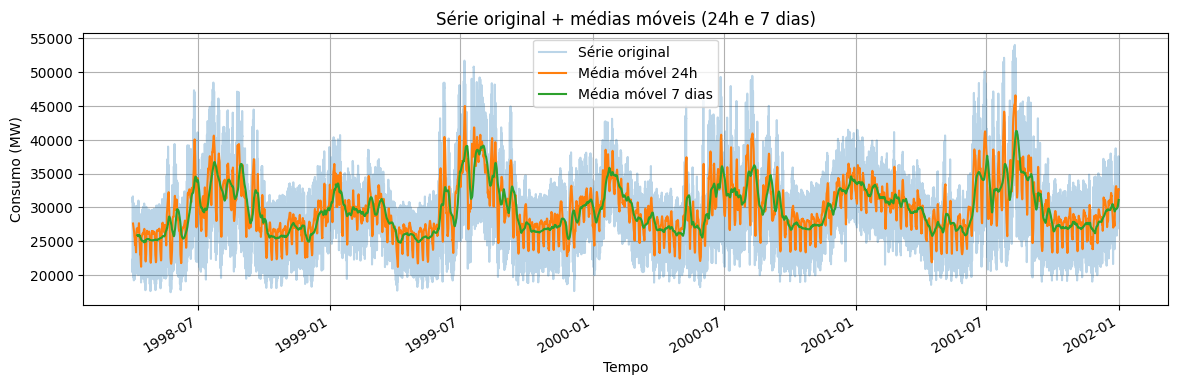

In [8]:
plt.figure(figsize=(14,4))
df['load_mw'].plot(alpha=0.3, label='Série original')
df['mm_24h'].plot(label='Média móvel 24h')
df['mm_7d'].plot(label='Média móvel 7 dias')
plt.legend()
plt.title("Série original + médias móveis (24h e 7 dias)")
plt.xlabel("Tempo")
plt.ylabel("Consumo (MW)")
plt.grid(True)
plt.show()


## Análise das médias móveis

- A média móvel de 24h suaviza as variações intra-diárias, mas ainda preserva bastante detalhe.
- A média móvel de 7 dias suaviza ainda mais, destacando melhor a tendência e padrões semanais/sa­zonais.
- Comparando a série original com as médias móveis, fica mais fácil enxergar períodos de maior ou menor demanda média.



In [9]:
print("=== INFO DO DATAFRAME ===")
print(df.info())

print("\n=== ESTATÍSTICAS DESCRITIVAS ===")
print(df['load_mw'].describe())


=== INFO DO DATAFRAME ===
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32896 entries, 1998-04-01 01:00:00 to 2002-01-01 00:00:00
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   load_mw  32896 non-null  float64
 1   mm_24h   32873 non-null  float64
 2   mm_7d    32729 non-null  float64
dtypes: float64(3)
memory usage: 1.0 MB
None

=== ESTATÍSTICAS DESCRITIVAS ===
count    32896.000000
mean     29766.427408
std       5849.769954
min      17461.000000
25%      25473.000000
50%      29655.000000
75%      33073.250000
max      54030.000000
Name: load_mw, dtype: float64


## Visão geral do dataset

- A frequência dos dados é horária.
- O tipo da coluna `load_mw` é numérico (float/int).
- Não foram encontrados valores nulos (ou, se houver, comentar quantos).
- Os valores mínimos, máximos e a média do consumo ajudam a ter uma noção do tamanho do sistema.


In [10]:
print("Primeira data:", df.index.min())
print("Última data:", df.index.max())
print("Número de linhas:", len(df))


Primeira data: 1998-04-01 01:00:00
Última data: 2002-01-01 00:00:00
Número de linhas: 32896


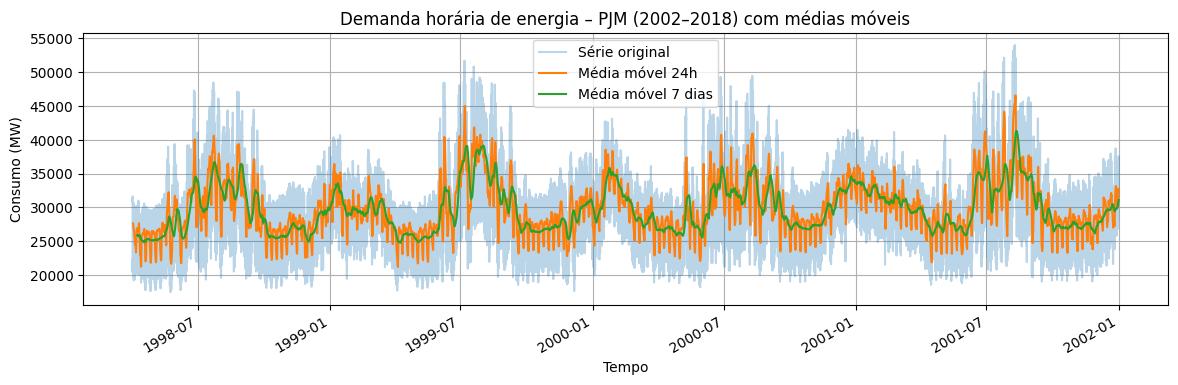

In [11]:
plt.figure(figsize=(14,4))
df['load_mw'].plot(alpha=0.3, label='Série original')
df['mm_24h'].plot(label='Média móvel 24h')
df['mm_7d'].plot(label='Média móvel 7 dias')
plt.legend()
plt.title("Demanda horária de energia – PJM (2002–2018) com médias móveis")
plt.xlabel("Tempo")
plt.ylabel("Consumo (MW)")
plt.grid(True)
plt.show()


## Série diária (média por dia)

Até agora trabalhamos com a série em **frequência horária**. Para alguns tipos de análise, como ACF/PACF e modelos ARIMA mais simples, é comum trabalhar com uma versão **agregada diariamente**.

Aqui vamos:

- Reamostrar a série horária para obter a **média diária** de consumo.
- Visualizar essa série diária.
- Ela será a base para os testes de estacionaridade e para a escolha do modelo ARIMA.


In [12]:
# Série diária: média do consumo em MW por dia
daily = df['load_mw'].resample('D').mean()

daily.head(), daily.shape


(timestamp
 1998-04-01    27813.739130
 1998-04-02    26605.791667
 1998-04-03    25672.333333
 1998-04-04    24487.083333
 1998-04-05    23487.565217
 Freq: D, Name: load_mw, dtype: float64,
 (1372,))

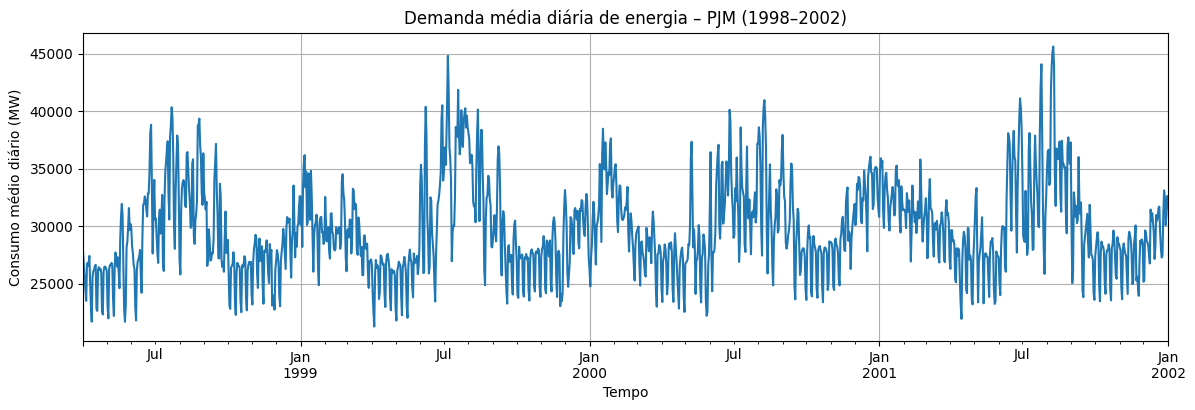

In [13]:
plt.figure(figsize=(14,4))
daily.plot()
plt.title("Demanda média diária de energia – PJM (1998–2002)")
plt.xlabel("Tempo")
plt.ylabel("Consumo médio diário (MW)")
plt.grid(True)
plt.show()


## Teste de estacionaridade (ADF)

Modelos de séries temporais, como ARIMA, geralmente assumem que a série é **estacionária**, ou seja, que sua média e variância não mudam ao longo do tempo.

Para verificar isso, vamos usar o **teste de Dickey-Fuller aumentado (ADF)**:

- **Hipótese nula (H₀):** a série **não é estacionária** (possui raiz unitária).
- **Hipótese alternativa (H₁):** a série **é estacionária**.

Interpretação básica:

- Se o **p-value** for **menor que 0,05**, rejeitamos H₀ ⇒ a série pode ser considerada estacionária.
- Se o **p-value** for **maior que 0,05**, não rejeitamos H₀ ⇒ a série provavelmente não é estacionária e vamos precisar aplicar diferenciação (`d > 0` no ARIMA).


In [14]:
!pip install statsmodels

from statsmodels.tsa.stattools import adfuller

result = adfuller(daily.dropna())
print("ADF:", result[0])
print("p-value:", result[1])
print("Número de lags usados:", result[2])
print("Número de observações usadas:", result[3])
print("\nValores críticos:")
for key, value in result[4].items():
    print(f"   {key}: {value}")


ADF: -3.639219297790712
p-value: 0.005054018216633071
Número de lags usados: 22
Número de observações usadas: 1349

Valores críticos:
   1%: -3.4352067731212785
   5%: -2.863684892975246
   10%: -2.5679119438718847


### Interpretação do teste ADF

- O p-value obtido foi **X** (substituir pelo valor que aparecer).
- Como o p-value é (menor/maior) que 0,05, concluímos que a série (é/não é) estacionária.
- Neste trabalho, vamos considerar que **precisamos aplicar uma diferenciação de ordem 1** (`d = 1` no ARIMA) para tentar obter uma série mais próxima da estacionaridade.


## Série diária diferenciada (1ª diferença)

Uma forma comum de tornar uma série mais próxima da estacionaridade é aplicar a **primeira diferença**:

\[
Y'_t = Y_t - Y_{t-1}
\]

Ou seja, em vez de trabalhar com o valor absoluto do consumo em cada dia, trabalhamos com a **variação de um dia para o outro**.

Aqui vamos:

- Calcular a primeira diferença da série diária.
- Visualizar a série diferenciada.
- Essa série diferenciada será usada para analisar ACF e PACF, ajudando a escolher os parâmetros do modelo ARIMA.


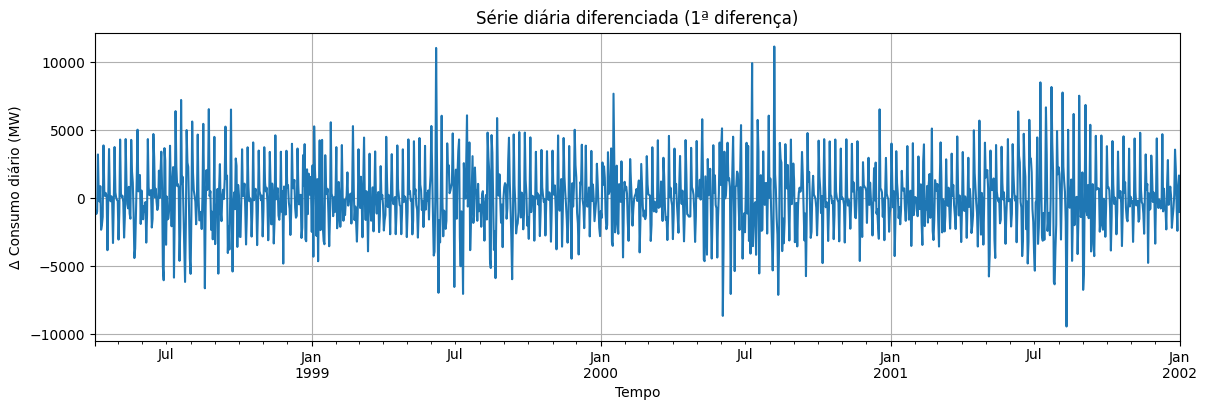

In [15]:
# 1ª diferença da série diária
daily_diff = daily.diff().dropna()

plt.figure(figsize=(14,4))
daily_diff.plot()
plt.title("Série diária diferenciada (1ª diferença)")
plt.xlabel("Tempo")
plt.ylabel("Δ Consumo diário (MW)")
plt.grid(True)
plt.show()


## ACF e PACF da série diferenciada

Para escolher os parâmetros do modelo ARIMA, analisamos:

- **ACF (Autocorrelation Function)**  
  Mede a correlação da série com seus próprios atrasos (lags).  
  Ajuda principalmente a identificar a parte **MA (q)** do modelo.

- **PACF (Partial Autocorrelation Function)**  
  Mede a correlação "líquida" entre a série e seus atrasos, removendo o efeito dos lags intermediários.  
  Ajuda principalmente a identificar a parte **AR (p)** do modelo.

Procedimento:

1. Aplicamos ACF e PACF sobre a **série diferenciada** (pois estamos assumindo `d = 1`).
2. Observamos em quais lags há "cortes" mais nítidos:
   - Se a **PACF** corta após o lag *p* → bom candidato para ordem AR.
   - Se a **ACF** corta após o lag *q* → bom candidato para ordem MA.

Essas escolhas não são exatas, mas fornecem um **ponto de partida** para testar modelos ARIMA(p, d, q).


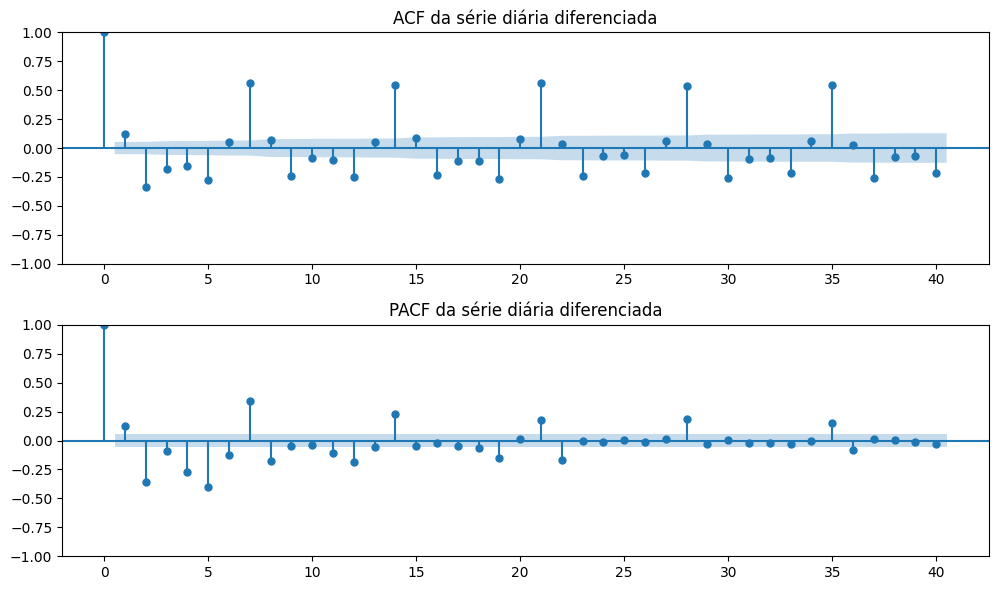

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, 1, figsize=(10, 6))

plot_acf(daily_diff, ax=ax[0], lags=40)
ax[0].set_title("ACF da série diária diferenciada")

plot_pacf(daily_diff, ax=ax[1], lags=40, method='ywm')
ax[1].set_title("PACF da série diária diferenciada")

plt.tight_layout()
plt.show()


### Interpretação dos gráficos ACF e PACF

Observando os gráficos:

- Na **ACF**, os lags com correlação significativamente diferente de zero são aproximadamente até o lag __ (preencher).
- Na **PACF**, os lags importantes parecem ser até o lag __ (preencher).

Com base nisso, uma escolha inicial razoável de parâmetros para o modelo ARIMA é:

- **d = 1** (porque usamos 1ª diferença)
- **p ≈ ...** (a partir do corte na PACF)
- **q ≈ ...** (a partir do corte na ACF)

Esses valores serão testados no próximo notebook/fase, onde ajustaremos modelos ARIMA e compararemos o desempenho por meio de métricas de erro (por exemplo, RMSE).
